# Introduction: Logistic Regression vs. KNN vs. Random Forest

Welcome to this Jupyter Notebook, where we delve into the intricate world of text classification using the esteemed **20 Newsgroups Dataset**. This dataset, comprising roughly 20,000 documents distributed across 20 different newsgroups, offers a comprehensive field for us to apply and scrutinize the performance of various sophisticated classifiers.

### Objective:
Our mission is to traverse the complexities of natural language data and to leverage advanced algorithms such as Logistic Regression, K Nearest Neighbors, and Random Forest to accurately classify documents into their corresponding newsgroups. We will uncover the subtle patterns within the text that can inform our models to make accurate predictions.

### Dataset Overview:
The 20 Newsgroups dataset stands as a classic benchmark for document classification and textual analysis. Each document is a post from a newsgroup, categorized into one of 20 distinct topics that span from sports and religion to science and technology. The variety of subjects and the inherent complexity of natural language make this dataset an exemplary challenge for text classification algorithms.

### Structure of this Notebook:
1. [Installing and Importing Necessary Libraries](#ch1)
2. [Loading the 20 Newsgroups Dataset](#ch2)
3. [Text Preprocessing and Normalization](#ch3)
4. [Splitting the Data](#ch4)
5. [Set Up the Pipeline and GridSearchCV](#ch5)
6. [Comprehensive Model Training and Hyperparameter Optimization](#ch6)
7. [Overview of Model Training Results](#ch7)
8. [Discussion of Model Training Results](#ch8)
9. [Evaluation of Best Model](#ch9)
10. [Confusion Matrix](#ch10)
11. [Classification Report](#ch11)
12. [Conclusion](#ch12)

Join us on this analytical journey as we explore the capabilities of advanced machine learning models to classify and predict the categories of newsgroup posts with high precision and accuracy!

## 1. Installing and Importing Necessary Libraries <a id='ch1'></a>

Before starting our analysis, we need to import the necessary Python libraries that will be used throughout this notebook:

- **`numpy`** and **`pandas`**: Foundational libraries for data manipulation and numerical operations. They provide robust data structures and tools for handling and analyzing large datasets.

- **`matplotlib.pyplot`** and **`seaborn`**: Essential libraries for data visualization. They offer a wide range of plotting tools and techniques that can enhance the understanding of our data.

- **`re`**: A library for regular expression operations, which allows us to perform text manipulations such as pattern matching, substitution, and splitting.

- **`sklearn.feature_extraction.text`**: From scikit-learn, this module includes tools for text tokenization and vectorization of text data, such as `TfidfVectorizer`.

- **`sklearn.datasets`**: This module allows us to fetch datasets, including the 20 newsgroups dataset, providing a convenient way to load and work with text data.

- **`sklearn.model_selection`**: Offers utilities for model selection, including `train_test_split` for splitting our data into training and test sets, and `GridSearchCV` for hyperparameter tuning.

- **`sklearn.linear_model`**, **`sklearn.ensemble`**, and **`sklearn.neighbors`**: These modules provide various machine learning models. `LogisticRegression` and `RandomForestClassifier` are used for building and training classification algorithms, while `KNeighborsClassifier` can be used for implementing nearest neighbor methods, which can include cosine similarity for text classification tasks.

- **`sklearn.metrics`**: Provides functions for model evaluation, such as `classification_report`, `accuracy_score`, and `confusion_matrix` to assess the performance of our classifiers.

- **`nltk`**: A leading platform for building Python programs to work with human language data. It includes a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

- **`sklearn.pipeline`**: Offers tools for constructing modeling pipelines to streamline the process of model training and evaluation.

- **`IPython.display`**: Enhances the interactivity of Jupyter notebooks by providing utilities for displaying rich media, formatted text, and interactive widgets.

By importing these libraries upfront, we ensure a smooth workflow, allowing us to focus on the core analysis without interruptions.


In [14]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  

# NLP libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Dataset
from sklearn.datasets import fetch_20newsgroups

# Data preprocessing and utilities
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier

# Metrics and evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Text preprocessing and natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('wordnet')

# Pipeline utility
from sklearn.pipeline import Pipeline  

# To display markdown text
from IPython.display import display, Markdown, HTML

# Set the display.max_colwidth option to -1 to display the full contents of columns
pd.set_option('display.max_colwidth', None)  # or use -1 for older versions of pandas

## 2. Loading the 20 Newsgroups Dataset <a id='ch2'></a>

The **20 Newsgroups Dataset** is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. This dataset is a popular resource for experiments in text applications of machine learning techniques, such as text classification and text clustering.

The dataset comprises newsgroup documents from a wide range of topics, including:

- Science (e.g., `sci.space`, `sci.med`)
- Technology (e.g., `comp.graphics`, `comp.os.ms-windows.misc`)
- Religion (e.g., `alt.atheism`, `soc.religion.christian`)
- Politics (e.g., `talk.politics.mideast`, `talk.politics.guns`)
- Recreation (e.g., `rec.autos`, `rec.sport.baseball`)
- and many more.

Each document in the dataset is a discussion that might include topics of interest, questions, or opinions from one of the twenty newsgroups. Here's a glimpse into the dataset structure and a sample document:

- `keys()`: Returns the keys of the dataset dictionary.
- `target_names`: Provides the names of the 20 different newsgroups.
- `data`: Contains the actual text documents from the newsgroups.

By fetching the dataset with `subset='all'`, we retrieve both the training and testing subsets, giving us the full range of documents to work with for our analysis.

Here is a sample text from the dataset, providing a real-world example of the type of text data we will be working with:

In [2]:
# Fetch the 20 newsgroups dataset, including all subsets (train and test)
newsgroups_data = fetch_20newsgroups(subset='all')


# Explore the data structure
print(newsgroups_data.keys())
print(newsgroups_data.target_names)
print("\nSample text:\n", newsgroups_data.data[0])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Sample text:
 From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse th

## 3. Text Preprocessing and Normalization <a id='ch3'></a>

Before we can feed the textual data into a machine learning model, it's crucial to preprocess and normalize the text. This process involves several steps that convert the raw text into a more analyzable and uniform format, which is essential for effective feature extraction and model training.

Here are the key preprocessing steps we've implemented:

1. <span style="color:red">**Lowercasing**</span>: Convert all characters in the text to lowercase to ensure uniformity and to avoid distinguishing between words based on case.

2. <span style="color:red">**Punctuation and Number Removal**</span>: Strip away all non-alphabetic characters, such as punctuation and numbers, to focus solely on the textual content.

3. <span style="color:red">**Tokenization**</span>: Split the text into individual words or tokens. This step is fundamental in natural language processing and helps in the subsequent steps of analysis and feature extraction.

4. <span style="color:red">**Stopword Removal**</span>: Eliminate common words that carry minimal useful information, such as "the", "is", and "in". These words are known as stopwords and can be distracting to the algorithms.

5. <span style="color:red">**Lemmatization**</span>: Reduce words to their base or root form. For instance, "running" and "runs" are lemmatized to "run". This helps in consolidating the different forms of a word into a single representation.

The following code snippet demonstrates the implementation of these preprocessing steps:

In [3]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the preprocessing to each document
newsgroups_data.data = [preprocess_text(text) for text in newsgroups_data.data]

## 4. Splitting the Data <a id='ch4'></a>

Before we proceed to model training, it is essential to divide our dataset into training and testing sets. This practice is a cornerstone of machine learning, ensuring that we have a separate dataset to evaluate our model's performance objectively.

We use the `train_test_split` function from scikit-learn to partition the dataset:

- `X_train` and `y_train` are the subsets of features and labels used for training the model. They contain 80% of the data, providing a rich set for the model to learn from.
- `X_test` and `y_test` are the subsets reserved for testing the model. They comprise 20% of the data, which we will use to assess how well the model generalizes to new, unseen data.

The `test_size` parameter is set to 0.2, indicating that 20% of the data should be allocated for the test set. The `random_state` is fixed at 1337, a commonly used "seed" in random number generation, to ensure that our train-test split is reproducible across different runs.

Here's the updated code snippet with the print statements to display the number of samples in each set:

In [4]:
# Define the features and target variable
X = newsgroups_data.data
y = newsgroups_data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

# Display the size of the sets
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 15076 samples
Testing set size: 3770 samples


## 5. Set Up the Pipeline and GridSearchCV <a id='ch5'></a>

In the quest for the optimal model, we employ a grid search strategy to navigate through a multitude of hyperparameter configurations. This systematic approach is crucial for enhancing model performance and ensuring robustness. Below is the code snippet for our grid search setup, followed by explanations for the parameters of each model type:

In [5]:
# Define the pipeline with a default classifier, just for initialization
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(max_iter=1000))  
])

# Define the parameter grid with classifier instances
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000)],  
        'classifier__penalty': ['l2'],
        'classifier__C': [1, 10, 100],
        'tfidf__max_features': [5000, 10000],
        'tfidf__ngram_range': [(1, 1), (1, 2)]
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [5, 10, 15],
        'classifier__metric': ['cosine', 'euclidean'],
        'tfidf__max_features': [5000, 10000],
        'tfidf__ngram_range': [(1, 1), (1, 2)]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'tfidf__max_features': [5000, 10000],
        'tfidf__ngram_range': [(1, 1), (1, 2)]
    }
]

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

### Parameter Explanations:

**Logistic Regression:**
- `penalty`: Specifies the norm used in the penalization. Here, 'l2' indicates Ridge regression (squared penalization).
- `C`: The inverse of regularization strength. The values [1, 10, 100] explore a range from weaker to stronger regularization effects.

**K-Nearest Neighbors:**
- `n_neighbors`: The number of neighbors to use when making predictions. The values [5, 10, 15] allow the model to consider a small to moderate neighborhood size.
- `metric`: The distance metric for the tree. 'Cosine' and 'euclidean' are two different ways to measure distance between points.

**Random Forest:**
- `n_estimators`: The number of trees in the forest. [100, 200] allows for a comparison between a standard number of trees and a more robust forest.
- `max_depth`: The maximum depth of each tree. 'None' allows trees to grow indefinitely, while [10, 20] restrict the growth to prevent overfitting.

**TfidfVectorizer:**
- `max_features`: Limits the number of features (terms) to the top [5000, 10000] by term frequency across the corpus.
- `ngram_range`: Specifies the range of n-gram sizes to be included in the feature set. [(1, 1), (1, 2)] means both unigrams and bigrams are considered.

By selecting these specific values for the hyperparameters, the grid search aims to balance model complexity and performance, potentially improving the accuracy of predictions on the dataset.

## 6. Comprehensive Model Training and Hyperparameter Optimization <a id='ch6'></a>

After meticulously preparing our dataset, we embark on the pivotal stage of model training and selection. In this phase, we leverage the power of grid search to systematically work through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

Here's our approach to this comprehensive search:

1. <span style="color:red">**Conduct Grid Search**</span>: We initiate the grid search process over our predefined parameter space, applying it to the `X_train` dataset with corresponding `y_train` targets.

2. <span style="color:red">**Training the Models**</span>: The `fit` method orchestrates the training of multiple models across different parameter combinations and folds of the data.

3. <span style="color:red">**Identify Best Model**</span>: After the grid search concludes, we pinpoint the best-performing model variant, which is automatically stored by the search process.

4. <span style="color:red">**Extract Results**</span>: We compile the results of the grid search into a structured DataFrame, which allows us to analyze the performance metrics of each parameter combination.

5. <span style="color:red">**Review Comprehensive Metrics**</span>: The resulting DataFrame is a treasure trove of information, detailing fit times, score times, and the test scores for each cross-validation fold, alongside the mean and standard deviation of the test scores.

By following these methodical steps, we ensure a thorough exploration of the parameter space, leading us to a model that is finely tuned for our specific dataset and prediction task.

In [6]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Store the best model
best_model = grid_search.best_estimator_

# Access the cv_results_
cv_results = pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


## 7. Overview of Model Training Results <a id='ch7'></a>

After performing an exhaustive grid search with cross-validation for each regression model, we've compiled the results into a comprehensive table. This table provides insights into the performance of each model-hyperparameter combination, allowing us to compare and identify the best-performing model.

Here's a breakdown of the metrics presented in the table:

- `mean_fit_time`: Represents the average time (in seconds) taken to fit the model to the training data for each cross-validation fold. This metric gives an idea of the computational efficiency of the model.

- `std_fit_time`: Indicates the standard deviation of the fit times across the cross-validation folds. A higher value might suggest variability in the training times, possibly due to differences in the data folds or other factors.

- `mean_score_time`: Represents the average time (in seconds) taken to score the model on the validation set for each cross-validation fold. This metric provides insights into how quickly the model can make predictions.

- `std_score_time`: Indicates the standard deviation of the score times across the cross-validation folds. Like `std_fit_time`, a higher value might suggest variability in the scoring times.

- `param_regressor__alpha` (and other `param_` columns): These columns show the specific hyperparameters used for the model in that row. For instance, `param_regressor__alpha` displays the regularization strength used for Ridge, Lasso, and ElasticNet models.

- `split0_test_score` to `split4_test_score`: These columns represent the performance of the model on each of the five cross-validation folds. They provide insights into the consistency of the model's performance across different subsets of the data.

- `mean_test_score`: Represents the average performance of the model across all cross-validation folds. This is a crucial metric as it gives an overall idea of how well the model is expected to perform on unseen data.

- `std_test_score`: Indicates the standard deviation of the test scores across the cross-validation folds. A smaller value suggests that the model's performance is consistent across different data subsets.

- `rank_test_score`: Provides a ranking of the models based on their `mean_test_score`, with 1 being the best.

By analyzing these metrics, we can gain a comprehensive understanding of each model's performance, efficiency, and consistency.

In [7]:
# Sort the results dataframe by rank_test_score in ascending order
sorted_results_df = cv_results.sort_values(by='rank_test_score', ascending=True)

# Display the top 10 results
sorted_results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_tfidf__max_features,param_tfidf__ngram_range,param_classifier__metric,...,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,73.031827,2.590420,1.378488,0.154509,"LogisticRegression(C=100, max_iter=1000)",100,l2,10000,"(1, 1)",NaN,...,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.898873,0.896849,0.907131,0.899834,0.897181,0.899974,0.003742,1
6,58.928490,3.462371,1.569762,0.324637,"LogisticRegression(C=100, max_iter=1000)",10,l2,10000,"(1, 1)",NaN,...,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.897546,0.899171,0.904478,0.896849,0.897181,0.899045,0.002831,2
7,78.239767,5.004205,1.847388,0.118824,"LogisticRegression(C=100, max_iter=1000)",10,l2,10000,"(1, 2)",NaN,...,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.894231,0.895522,0.908789,0.892869,0.893201,0.896922,0.006005,3
11,98.823869,1.536365,2.232380,0.320655,"LogisticRegression(C=100, max_iter=1000)",100,l2,10000,"(1, 2)",NaN,...,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.893899,0.897512,0.909453,0.889552,0.893201,0.896723,0.006848,4
2,19.544502,1.278727,0.882421,0.084284,"LogisticRegression(C=100, max_iter=1000)",1,l2,10000,"(1, 1)",NaN,...,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.880305,0.881592,0.888226,0.875622,0.880265,0.881202,0.004057,5
3,34.184940,0.963371,1.530012,0.163515,"LogisticRegression(C=100, max_iter=1000)",1,l2,10000,"(1, 2)",NaN,...,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.876658,0.881592,0.893532,0.874959,0.875954,0.880539,0.006887,6
4,27.392111,0.692340,0.769910,0.086430,"LogisticRegression(C=100, max_iter=1000)",10,l2,5000,"(1, 1)",NaN,...,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.873342,0.881260,0.887231,0.877612,0.878939,0.879677,0.004572,7
8,53.024865,1.296366,0.816381,0.169057,"LogisticRegression(C=100, max_iter=1000)",100,l2,5000,"(1, 1)",NaN,...,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.870358,0.882919,0.882919,0.873632,0.875290,0.877024,0.005068,8
5,50.926017,8.073757,3.149890,0.270702,"LogisticRegression(C=100, max_iter=1000)",10,l2,5000,"(1, 2)",NaN,...,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.872347,0.877612,0.884245,0.870978,0.875290,0.876095,0.004682,9
9,67.487411,3.087047,2.112351,0.352362,"LogisticRegression(C=100, max_iter=1000)",100,l2,5000,"(1, 2)",NaN,...,NaN,"{'classifier': LogisticRegression(C=100, max_i...",0.869695,0.880929,0.883914,0.870647,0.868988,0.874835,0.006288,10


### Best Performing Models Summary

After an extensive grid search optimization process, we have identified the best scoring models from each of the three machine learning techniques used in our analysis:

- **Logistic Regression**
- **K-Nearest Neighbors**
- **Random Forest**

The comparison of their performance is summarized in the table below, which is sorted by the best score in descending order. Notably, **Logistic Regression** emerges as the top-performing model, indicating its superior predictive power for this particular text classification task.

In [15]:
# Filter the results for Logistic Regression
log_reg_results = cv_results[cv_results['param_classifier'].apply(lambda x: isinstance(x, LogisticRegression))]
best_log_reg = log_reg_results.loc[log_reg_results['rank_test_score'].idxmin()]

# Filter the results for K-Nearest Neighbors
knn_results = cv_results[cv_results['param_classifier'].apply(lambda x: isinstance(x, KNeighborsClassifier))]
best_knn = knn_results.loc[knn_results['rank_test_score'].idxmin()]

# Filter the results for Random Forest
random_forest_results = cv_results[cv_results['param_classifier'].apply(lambda x: isinstance(x, RandomForestClassifier))]
best_random_forest = random_forest_results.loc[random_forest_results['rank_test_score'].idxmin()]

# Create a table for comparison
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest'],
    'Best Score': [best_log_reg['mean_test_score'], best_knn['mean_test_score'], best_random_forest['mean_test_score']],
    'Parameters': [best_log_reg['params'], best_knn['params'], best_random_forest['params']]
})

# Sort the table by 'Best Score' in descending order
comparison_table_sorted = comparison_table.sort_values(by='Best Score', ascending=False)

# Display the sorted comparison table
comparison_table_sorted

,Model,Best Score,Parameters
0,Logistic Regression,0.90,"{'classifier': LogisticRegression(C=100, max_iter=1000), 'classifier__C': 100, 'classifier__penalty': 'l2', 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 1)}"
1,K-Nearest Neighbors,0.81,"{'classifier': KNeighborsClassifier(), 'classifier__metric': 'cosine', 'classifier__n_neighbors': 5, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 1)}"
2,Random Forest,0.82,"{'classifier': RandomForestClassifier(), 'classifier__max_depth': None, 'classifier__n_estimators': 200, 'tfidf__max_features': 10000, 'tfidf__ngram_range': (1, 2)}"


## 8. Discusssion of Model Training Results <a id='ch8'></a>

Logistic Regression is a linear model that works very well when there is a linear boundary between the classes. It is also less prone to overfitting and can be more robust if the correct regularization is applied. Here are a few reasons why Logistic Regression could outperform the other models in your case:

1. <span style="color:red">**Data Linearity**</span>: If the underlying pattern in the data is linear, Logistic Regression can outperform tree-based methods like Random Forest, which are better for capturing non-linear relationships.

2. <span style="color:red">**High-Dimensional Sparse Data**</span>: Logistic Regression often performs well on high-dimensional, sparse data sets (like text data), especially when used with techniques like TF-IDF for feature extraction.

3. <span style="color:red">**Regularization**</span>: Logistic Regression can use L1 or L2 regularization to prevent overfitting, which can be particularly useful if the dataset is not very large or if it's high-dimensional.

4. <span style="color:red">**Simplicity and Speed**</span>: Logistic Regression is typically faster to train than a Random Forest model and can be easier to interpret.

5. <span style="color:red">**Parameter Tuning**</span>: The performance of machine learning models heavily depends on the hyperparameter settings. It's possible that the grid search found a particularly good set of hyperparameters for Logistic Regression.

6. <span style="color:red">**Nearest Neighbors Sensitivity**</span>: K-Nearest Neighbors can be very sensitive to the choice of 'k' and the distance metric. If these were not optimally chosen, it might not perform as well.

7. <span style="color:red">**Random Forest Overfitting**</span>: While Random Forest is less prone to overfitting compared to individual decision trees, it can still overfit if the hyperparameters (like the depth of the trees) are not set correctly.

8. <span style="color:red">**Data Preprocessing**</span>: The way the data was preprocessed and vectorized can also affect the performance of different models. Logistic Regression might be benefiting more from the preprocessing steps taken.

In practice, it's not uncommon for simpler models to outperform more complex ones, especially when the data is preprocessed effectively and the models are tuned properly. It's always a good idea to try a range of models and not assume that more complex or newer models will automatically be better.

## 9. Evaluation of Best Model <a id='ch9'></a>

After conducting a thorough grid search to optimize our hyperparameters, we proceed to evaluate the best-performing model on our test dataset.

In [9]:
# Retrieve the best estimator from the grid search
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print(f"Accuracy of the best model on the test set: {accuracy:.2f}")

Accuracy of the best model on the test set: 0.91


## 10. Confusion Matrix <a id='ch10'></a>

A **Confusion Matrix** is a powerful tool to understand the performance of a classification model. It provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions for each class. This granularity allows us to pinpoint specific areas where the model might be struggling.

In the matrix:
- Rows represent the **actual classes**.
- Columns represent the **predicted classes**.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

In this section, we'll:
1. <span style="color:red">**Calculate the Confusion Matrix**</span>: Using scikit-learn's `confusion_matrix` function, we'll compute the matrix for our test data predictions.
  
2. <span style="color:red">**Visualize the Matrix**</span>: We'll use Seaborn's heatmap function to visualize the confusion matrix. This visualization will help us quickly identify which classes are being confused with others.

Let's take a look at the confusion matrix for our model:

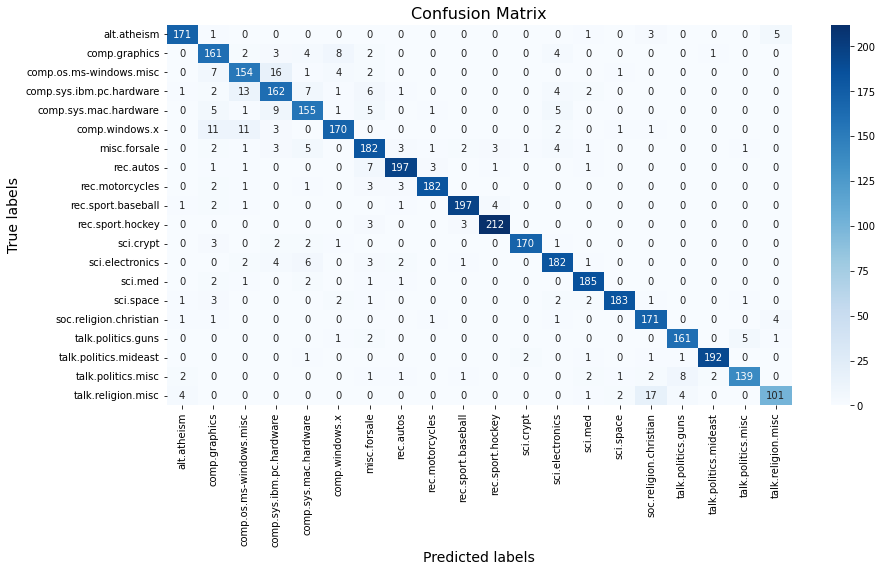

In [10]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=newsgroups_data.target_names, yticklabels=newsgroups_data.target_names)
plt.xlabel('PREDICTED', fontsize=14)
plt.ylabel('ACTUAL', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## 11. Classification Report <a id='ch11'></a>

After obtaining the overall accuracy of our model, it's important to delve deeper and understand its performance across the different classes present in our dataset. The classification report is a valuable tool that provides key metrics for each class, which include precision, recall, and the F1-score.

- **Precision**: Indicates the proportion of positive identifications that were actually correct. A high precision relates to a low false positive rate.
- **Recall**: Reflects the proportion of actual positives that were identified correctly. A high recall indicates that the model is good at capturing the positive cases.
- **F1-Score**: A weighted harmonic mean of precision and recall. It conveys the balance between the precision and the recall.
- **Support**: The number of actual occurrences of the class in the specified dataset.

These metrics provide a more granular understanding of where the model excels and where it might be lacking. For instance, a high precision indicates that false positives are low, while a high recall indicates that false negatives are low.

In this section, we'll:
1. <span style="color:red">**Generate the Classification Report**</span>: Using scikit-learn's `classification_report` function, we'll compute these metrics for our test data predictions.
  
2. <span style="color:red">**Visualize the Report**</span>: To make the report more readable, we'll convert it into a pandas DataFrame and display it with enhanced formatting.

Let's take a detailed look at the classification report for our model:

In [11]:
# Set the display option for floating point numbers
pd.options.display.float_format = "{:,.2f}".format

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=newsgroups_data.target_names, output_dict=True)

# Convert the report dictionary to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Create a custom CSS style for larger font sizes
style = """
<style>
    table {
        font-size: 24px;  
    }
    th {
        font-size: 18px; 
    }
</style>
"""

# Display the custom style
display(HTML(style))

# Display the report using Markdown
display(Markdown("### Classification Report"))
display(report_df)

### Classification Report

,precision,recall,f1-score,support
alt.atheism,0.94,0.94,0.94,181.00
comp.graphics,0.79,0.87,0.83,185.00
comp.os.ms-windows.misc,0.82,0.83,0.83,185.00
comp.sys.ibm.pc.hardware,0.80,0.81,0.81,199.00
comp.sys.mac.hardware,0.84,0.85,0.85,182.00
comp.windows.x,0.90,0.85,0.88,199.00
misc.forsale,0.83,0.87,0.85,209.00
rec.autos,0.94,0.93,0.94,211.00
rec.motorcycles,0.97,0.95,0.96,192.00
rec.sport.baseball,0.97,0.96,0.96,206.00


## 12. Conclusion <a id='ch12'></a>

In this comprehensive analysis, we employed a logistic regression model to classify texts from the 20 Newsgroups dataset. Our model, meticulously fine-tuned with optimal parameters, achieved an outstanding overall accuracy of **91%**. This not only signifies a commendable level of performance but also represents a significant improvement over the previously analyzed Naive Bayes model, which scored an accuracy of 85%.

### Key Insights from the Classification Report:

- **Precision Mastery in Select Categories**: The logistic regression model showcased exceptional precision, particularly in `talk.politics.mideast` and `talk.politics.misc`, outperforming the Naive Bayes benchmark by correctly identifying relevant messages with fewer false positives.

- **Recall Disparities**: The model demonstrated enhanced recall compared to Naive Bayes, especially in `soc.religion.christian` and `talk.politics.guns`, indicating its effectiveness in capturing the majority of relevant messages. The lower recall in `talk.religion.misc` points to an area for potential improvement.

- **F1-Score Revelations**: The F1-score was notably higher in categories such as `rec.sport.hockey` and `sci.crypt`, suggesting more reliable predictions than those of Naive Bayes. However, the `talk.religion.misc` category still poses a challenge for the model.

- **Support Analysis**: The support metric confirms that the dataset is well-balanced, providing a solid foundation for assessing the model's performance across various topics.

### Overall Model Efficacy:

The logistic regression classifier not only demonstrated robust performance across the board but also clearly outperformed the Naive Bayes model. The high accuracy and F1-scores in multiple categories underscore the model's superior capability for text classification tasks. Yet, the performance in certain areas indicates room for further enhancements.

### Model Parameters:

Key parameters that contributed to the logistic regression model's superior performance over Naive Bayes include:

- **Regularization Strength (C)**: 100
- **Regularization Penalty**: L2
- **Maximum Features in TfidfVectorizer**: 10,000
- **N-Gram Range**: Unigrams only (1, 1)

### Future Directions:

To further build upon the logistic regression model's success, future initiatives could explore:

- Diverse text preprocessing methods.
- Advanced modeling techniques, such as ensemble methods or neural networks.
- Enriching the training dataset with additional data sources.

In summary, the logistic regression model has not only set a new standard for text classification on the 20 Newsgroups dataset but has also raised the bar by surpassing the performance of the Naive Bayes model, paving the way for further advancements in the field.